In [1]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt   
import seaborn as sns
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")
import sklearn.metrics as metrics
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
import statsmodels.formula.api as smf
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
data = pd.read_excel('Company_Data2015-1.xlsx')
data.head()

,Co_Code,Co_Name,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,Current Liabilities and Provisions,Total Assets/Liabilities,Gross Sales,Net Sales,Other Income,Value Of Output,Cost of Production,Selling Cost,PBIDT,PBDT,PBIT,PBT,PAT,Adjusted PAT,CP,Revenue earnings in forex,Revenue expenses in forex,Capital expenses in forex,Book Value (Unit Curr),Book Value (Adj.) (Unit Curr),Market Capitalisation,CEPS (annualised) (Unit Curr),Cash Flow From Operating Activities,Cash Flow From Investing Activities,Cash Flow From Financing Activities,ROG-Net Worth (%),ROG-Capital Employed (%),ROG-Gross Block (%),ROG-Gross Sales (%),ROG-Net Sales (%),ROG-Cost of Production (%),ROG-Total Assets (%),ROG-PBIDT (%),ROG-PBDT (%),ROG-PBIT (%),ROG-PBT (%),ROG-PAT (%),ROG-CP (%),ROG-Revenue earnings in forex (%),ROG-Revenue expenses in forex (%),ROG-Market Capitalisation (%),Current Ratio[Latest],Fixed Assets Ratio[Latest],Inventory Ratio[Latest],Debtors Ratio[Latest],Total Asset Turnover Ratio[Latest],Interest Cover Ratio[Latest],PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,1116.85,109.60,0.00,0.00,7.60,-0.07,137.67,0.00,-179.06,-926.52,-185.53,-932.99,-932.99,-937.85,-926.52,0.00,0.00,0.00,-167.58,-167.58,0.00,-22.09,-102.47,1.46,92.58,-15.31,-20.76,-9.75,0.00,0.00,1.38,-25.75,5.23,-19.29,4.43,-19.33,-19.33,-19.29,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,-0.20,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,1585.74,6043.94,2892.73,2892.73,46.27,2900.71,2572.46,40.51,646.46,-4.32,35.53,-615.25,-615.25,-617.14,-4.32,6.35,143.42,141.17,-15.18,-15.18,1544.39,-0.02,635.91,-785.00,176.93,-26.15,6.30,3.17,5.92,5.92,13.16,6.66,5.24,-108.77,614.89,-9.85,-9.85,-108.77,1.93,34.00,6.61,0.08,0.25,804.44,10.35,0.30,-0.84,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,4601.39,12316.07,392.13,392.13,9.55,301.16,408.51,54.83,-281.92,-1086.71,-381.10,-1185.89,-897.70,-873.39,-798.52,0.00,86.36,2.27,94.14,94.14,1220.81,-148.31,-873.40,-458.27,1187.51,-61.86,15.66,-2.07,-75.87,-75.87,-69.93,-0.78,-169.69,-431.68,-221.85,-300.41,-350.43,-642.67,-100.00,-81.21,-6.31,1.06,0.03,0.01,0.42,0.00,-2.21,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,3646.54,6000.42,1354.39,1354.39,223.85,1350.14,1326.99,3.34,-213.01,-677.57,-336.73,-801.29,-801.29,-770.18,-677.57,0.89,28.88,0.00,-39.64,-39.64,194.27,-43.08,324.47,17.31,-412.55,-450.67,-40.84,-1.80,8.33,8.33,16.59,-10.12,-203.84,-102.72,-455.28,-80.23,-70.57,-88.52,-52.91,-33.85,-13.94,0.09,5.08,411.15,9.26,0.00,-0.16,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,2849.58,7524.91,38.72,38.72,9.82,38.72,186.29,1.97,-647.86,-944.42,-710.13,-1006.69,-864.58,-327.77,-802.31,0.00,15.62,0.00,-212.89,-212.89,113.68,-159.50,-191.54,61.34,143.65,-559.83,-11.76,0.34,-80.61,-80.61,-48.80,-5.81,-40.07,3.28,-38.72,1.87,-2.59,-1.13,-100.00,-91.17,-12.91,0.50,0.05,0.02,1.28,0.01,-0.73,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 67 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Co_Code                              3586 non-null   int64  
 1   Co_Name                              3586 non-null   object 
 2   Networth Next Year                   3586 non-null   float64
 3   Equity Paid Up                       3586 non-null   float64
 4   Networth                             3586 non-null   float64
 5   Capital Employed                     3586 non-null   float64
 6   Total Debt                           3586 non-null   float64
 7   Gross Block                          3586 non-null   float64
 8   Net Working Capital                  3586 non-null   float64
 9   Current Assets                       3586 non-null   float64
 10  Current Liabilities and Provisions   3586 non-null   float64
 11  Total Assets/Liabilities      

#### Fixing messy column names (containing spaces) for ease of use

In [4]:
data.columns = data.columns.str.replace(' ', '_').str.replace('(', '').str.replace('.', '').str.replace('-', '_').str.replace('[', '_').str.replace(']', '').str.replace(')', '').str.replace('%', 'perc').str.replace('/', '_to_')

In [5]:
data.head()

,Co_Code,Co_Name,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block_,Net_Working_Capital_,Current_Assets_,Current_Liabilities_and_Provisions_,Total_Assets_to_Liabilities_,Gross_Sales,Net_Sales,Other_Income,Value_Of_Output,Cost_of_Production,Selling_Cost,PBIDT,PBDT,PBIT,PBT,PAT,Adjusted_PAT,CP,Revenue_earnings_in_forex,Revenue_expenses_in_forex,Capital_expenses_in_forex,Book_Value_Unit_Curr,Book_Value_Adj_Unit_Curr,Market_Capitalisation,CEPS_annualised_Unit_Curr,Cash_Flow_From_Operating_Activities,Cash_Flow_From_Investing_Activities,Cash_Flow_From_Financing_Activities,ROG_Net_Worth_perc,ROG_Capital_Employed_perc,ROG_Gross_Block_perc,ROG_Gross_Sales_perc,ROG_Net_Sales_perc,ROG_Cost_of_Production_perc,ROG_Total_Assets_perc,ROG_PBIDT_perc,ROG_PBDT_perc,ROG_PBIT_perc,ROG_PBT_perc,ROG_PAT_perc,ROG_CP_perc,ROG_Revenue_earnings_in_forex_perc,ROG_Revenue_expenses_in_forex_perc,ROG_Market_Capitalisation_perc,Current_Ratio_Latest,Fixed_Assets_Ratio_Latest,Inventory_Ratio_Latest,Debtors_Ratio_Latest,Total_Asset_Turnover_Ratio_Latest,Interest_Cover_Ratio_Latest,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,1116.85,109.60,0.00,0.00,7.60,-0.07,137.67,0.00,-179.06,-926.52,-185.53,-932.99,-932.99,-937.85,-926.52,0.00,0.00,0.00,-167.58,-167.58,0.00,-22.09,-102.47,1.46,92.58,-15.31,-20.76,-9.75,0.00,0.00,1.38,-25.75,5.23,-19.29,4.43,-19.33,-19.33,-19.29,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,-0.20,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,1585.74,6043.94,2892.73,2892.73,46.27,2900.71,2572.46,40.51,646.46,-4.32,35.53,-615.25,-615.25,-617.14,-4.32,6.35,143.42,141.17,-15.18,-15.18,1544.39,-0.02,635.91,-785.00,176.93,-26.15,6.30,3.17,5.92,5.92,13.16,6.66,5.24,-108.77,614.89,-9.85,-9.85,-108.77,1.93,34.00,6.61,0.08,0.25,804.44,10.35,0.30,-0.84,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,4601.39,12316.07,392.13,392.13,9.55,301.16,408.51,54.83,-281.92,-1086.71,-381.10,-1185.89,-897.70,-873.39,-798.52,0.00,86.36,2.27,94.14,94.14,1220.81,-148.31,-873.40,-458.27,1187.51,-61.86,15.66,-2.07,-75.87,-75.87,-69.93,-0.78,-169.69,-431.68,-221.85,-300.41,-350.43,-642.67,-100.00,-81.21,-6.31,1.06,0.03,0.01,0.42,0.00,-2.21,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,3646.54,6000.42,1354.39,1354.39,223.85,1350.14,1326.99,3.34,-213.01,-677.57,-336.73,-801.29,-801.29,-770.18,-677.57,0.89,28.88,0.00,-39.64,-39.64,194.27,-43.08,324.47,17.31,-412.55,-450.67,-40.84,-1.80,8.33,8.33,16.59,-10.12,-203.84,-102.72,-455.28,-80.23,-70.57,-88.52,-52.91,-33.85,-13.94,0.09,5.08,411.15,9.26,0.00,-0.16,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,2849.58,7524.91,38.72,38.72,9.82,38.72,186.29,1.97,-647.86,-944.42,-710.13,-1006.69,-864.58,-327.77,-802.31,0.00,15.62,0.00,-212.89,-212.89,113.68,-159.50,-191.54,61.34,143.65,-559.83,-11.76,0.34,-80.61,-80.61,-48.80,-5.81,-40.07,3.28,-38.72,1.87,-2.59,-1.13,-100.00,-91.17,-12.91,0.50,0.05,0.02,1.28,0.01,-0.73,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 67 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Co_Code                              3586 non-null   int64  
 1   Co_Name                              3586 non-null   object 
 2   Networth_Next_Year                   3586 non-null   float64
 3   Equity_Paid_Up                       3586 non-null   float64
 4   Networth                             3586 non-null   float64
 5   Capital_Employed                     3586 non-null   float64
 6   Total_Debt                           3586 non-null   float64
 7   Gross_Block_                         3586 non-null   float64
 8   Net_Working_Capital_                 3586 non-null   float64
 9   Current_Assets_                      3586 non-null   float64
 10  Current_Liabilities_and_Provisions_  3586 non-null   float64
 11  Total_Assets_to_Liabilities_  

In [7]:
data.shape

(3586, 67)

### Dataset Inferences:

This dataset has shape 3586 rows and 67 columns.

In [8]:
pd.options.display.float_format = '{:.2f}'.format  
data.describe()

,Co_Code,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block_,Net_Working_Capital_,Current_Assets_,Current_Liabilities_and_Provisions_,Total_Assets_to_Liabilities_,Gross_Sales,Net_Sales,Other_Income,Value_Of_Output,Cost_of_Production,Selling_Cost,PBIDT,PBDT,PBIT,PBT,PAT,Adjusted_PAT,CP,Revenue_earnings_in_forex,Revenue_expenses_in_forex,Capital_expenses_in_forex,Book_Value_Unit_Curr,Book_Value_Adj_Unit_Curr,Market_Capitalisation,CEPS_annualised_Unit_Curr,Cash_Flow_From_Operating_Activities,Cash_Flow_From_Investing_Activities,Cash_Flow_From_Financing_Activities,ROG_Net_Worth_perc,ROG_Capital_Employed_perc,ROG_Gross_Block_perc,ROG_Gross_Sales_perc,ROG_Net_Sales_perc,ROG_Cost_of_Production_perc,ROG_Total_Assets_perc,ROG_PBIDT_perc,ROG_PBDT_perc,ROG_PBIT_perc,ROG_PBT_perc,ROG_PAT_perc,ROG_CP_perc,ROG_Revenue_earnings_in_forex_perc,ROG_Revenue_expenses_in_forex_perc,ROG_Market_Capitalisation_perc,Current_Ratio_Latest,Fixed_Assets_Ratio_Latest,Inventory_Ratio_Latest,Debtors_Ratio_Latest,Total_Asset_Turnover_Ratio_Latest,Interest_Cover_Ratio_Latest,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block
count,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3582.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3585.00,3585.00,3585.00,3585.00,3585.00,3585.00,3585.00,3585.00,3585.00,3585.00,3585.00,3586.00,3586.00,3483.00,3586.00,3586.00
mean,16065.39,725.05,62.97,649.75,2799.61,1994.82,594.18,410.81,1960.35,391.99,1778.45,1123.74,1079.70,48.73,1077.19,798.54,25.55,248.18,116.27,217.66,85.75,61.22,60.06,91.73,131.17,256.33,7.66,157.24,2243.15,1664.09,36.02,65.77,-60.87,11.44,1237.62,2988.88,37.55,242.67,242.59,310.49,2793.28,375.85,336.38,374.70,224.07,112.23,221.09,37.23,364.86,63.68,12.06,51.54,37.80,33.03,1.24,16.39,-51.16,-109.21,-311.57,-307.01,-365.06,603.89,2057.85,79.64,0.82,61.88
std,19776.82,4769.68,778.76,4091.99,26975.14,23652.84,4871.55,6301.22,22577.57,2675.00,11437.57,10603.70,9996.57,426.04,9843.88,9076.70,194.24,1949.59,956.20,1850.97,799.93,620.30,580.43,780.79,1150.73,4132.34,111.43,1622.66,128283.73,12805.17,828.42,1455.05,701.97,1272.26,41041.93,126472.87,893.62,6103.53,6103.49,5573.22,125941.65,23278.40,20353.40,22462.79,19659.23,13480.52,13980.20,658.67,15233.64,1047.93,108.41,681.15,458.19,489.56,2.67,351.74,1795.13,3057.64,10921.59,10676.15,12500.05,10636.76,54169.48,137.85,1.20,976.82
min,4.00,-8021.60,0.00,-7027.48,-1824.75,-0.72,-41.19,-13162.42,-0.91,-0.23,-4.51,-62.59,-62.59,-448.72,-119.10,-22.65,0.00,-4655.14,-5874.53,-4812.95,-6032.34,-6032.34,-4418.72,-5874.53,0.00,0.00,0.00,-3371.57,-33715.70,0.00,-1808.00,-25469.23,-23843.45,-38374.04,-14485.71,-8614.63,-116.12,-5503.70,-5503.70,-2130.23,-136.13,-52200.00,-52200.00,-58500.00,-78900.00,-114500.00,-52200.00,-100.00,-100.00,-98.05,0.00,0.00,0.00,0.00,0.00,-5450.00,-78870.45,-141600.00,-590500.00,-572000.00,-688600.00,0.00,0.00,-199.00,-0.33,-61.00
25%,3029.25,3.98,3.75,3.89,7.60,0.03,0.57,0.94,4.00,0.73,10.55,1.44,1.44,0.02,1.41,0.94,0.00,0.04,0.00,0.00,-0.06,-0.06,-0.09,0.00,0.00,0.00,0.00,7.96,7.06,0.00,0.00,-0.31,-5.12,-5.85,-1.49,-3.83,0.00,-8.08,-8.12,-7.24,-3.97,-23.36,-30.60,-31.35,-41.23,-43.73,-29.51,0.00,0.00,0.00,0.88,0.27,0.00,0.42,0.07,0.00,0.00,0.00,0.00,0.00,0.00,8.00,8.00,0.00,0.07,0.27
50%,6077.50,19.02,8.29,18.58,39.09,7.49,15.87,10.14,24.54,9.23,52.01,31.21,30.44,0.45,30.89,25.99,0.16,2.04,0.80,1.15,0.31,0.26,0.21,0.74,0.00,0.00,0.00,21.66,18.93,8.37,1.15,0.45,-0.12,0.00,1.84,1.38,0.25,3.31,3.21,4.42,1.48,4.57,3.37,2.13,0.03,0.00,4.62,0.00,0.00,0.00,

In [9]:
data = data.drop(['Co_Name'], axis = 1)

In [10]:
data.head()

,Co_Code,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block_,Net_Working_Capital_,Current_Assets_,Current_Liabilities_and_Provisions_,Total_Assets_to_Liabilities_,Gross_Sales,Net_Sales,Other_Income,Value_Of_Output,Cost_of_Production,Selling_Cost,PBIDT,PBDT,PBIT,PBT,PAT,Adjusted_PAT,CP,Revenue_earnings_in_forex,Revenue_expenses_in_forex,Capital_expenses_in_forex,Book_Value_Unit_Curr,Book_Value_Adj_Unit_Curr,Market_Capitalisation,CEPS_annualised_Unit_Curr,Cash_Flow_From_Operating_Activities,Cash_Flow_From_Investing_Activities,Cash_Flow_From_Financing_Activities,ROG_Net_Worth_perc,ROG_Capital_Employed_perc,ROG_Gross_Block_perc,ROG_Gross_Sales_perc,ROG_Net_Sales_perc,ROG_Cost_of_Production_perc,ROG_Total_Assets_perc,ROG_PBIDT_perc,ROG_PBDT_perc,ROG_PBIT_perc,ROG_PBT_perc,ROG_PAT_perc,ROG_CP_perc,ROG_Revenue_earnings_in_forex_perc,ROG_Revenue_expenses_in_forex_perc,ROG_Market_Capitalisation_perc,Current_Ratio_Latest,Fixed_Assets_Ratio_Latest,Inventory_Ratio_Latest,Debtors_Ratio_Latest,Total_Asset_Turnover_Ratio_Latest,Interest_Cover_Ratio_Latest,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block
0,16974,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,1116.85,109.60,0.00,0.00,7.60,-0.07,137.67,0.00,-179.06,-926.52,-185.53,-932.99,-932.99,-937.85,-926.52,0.00,0.00,0.00,-167.58,-167.58,0.00,-22.09,-102.47,1.46,92.58,-15.31,-20.76,-9.75,0.00,0.00,1.38,-25.75,5.23,-19.29,4.43,-19.33,-19.33,-19.29,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,-0.20,0.00,0.00,0.00,0.00,0.00,0,0,45.00,0.00,0.00
1,21214,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,1585.74,6043.94,2892.73,2892.73,46.27,2900.71,2572.46,40.51,646.46,-4.32,35.53,-615.25,-615.25,-617.14,-4.32,6.35,143.42,141.17,-15.18,-15.18,1544.39,-0.02,635.91,-785.00,176.93,-26.15,6.30,3.17,5.92,5.92,13.16,6.66,5.24,-108.77,614.89,-9.85,-9.85,-108.77,1.93,34.00,6.61,0.08,0.25,804.44,10.35,0.30,-0.84,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.00,0.31,0.24
2,14852,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,4601.39,12316.07,392.13,392.13,9.55,301.16,408.51,54.83,-281.92,-1086.71,-381.10,-1185.89,-897.70,-873.39,-798.52,0.00,86.36,2.27,94.14,94.14,1220.81,-148.31,-873.40,-458.27,1187.51,-61.86,15.66,-2.07,-75.87,-75.87,-69.93,-0.78,-169.69,-431.68,-221.85,-300.41,-350.43,-642.67,-100.00,-81.21,-6.31,1.06,0.03,0.01,0.42,0.00,-2.21,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.00,-0.03,-0.26
3,2439,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,3646.54,6000.42,1354.39,1354.39,223.85,1350.14,1326.99,3.34,-213.01,-677.57,-336.73,-801.29,-801.29,-770.18,-677.57,0.89,28.88,0.00,-39.64,-39.64,194.27,-43.08,324.47,17.31,-412.55,-450.67,-40.84,-1.80,8.33,8.33,16.59,-10.12,-203.84,-102.72,-455.28,-80.23,-70.57,-88.52,-52.91,-33.85,-13.94,0.09,5.08,411.15,9.26,0.00,-0.16,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.00,0.24,1.90
4,23505,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,2849.58,7524.91,38.72,38.72,9.82,38.72,186.29,1.97,-647.86,-944.42,-710.13,-1006.69,-864.58,-327.77,-802.31,0.00,15.62,0.00,-212.89,-212.89,113.68,-159.50,-191.54,61.34,143.65,-559.83,-11.76,0.34,-80.61,-80.61,-48.80,-5.81,-40.07,3.28,-38.72,1.87,-2.59,-1.13,-100.00,-91.17,-12.91,0.50,0.05,0.02,1.28,0.01,-0.73,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.00,0.01,0.05


## Outlier Treatment

## Checking outliers
### Before Outlier treatment checking the presence of Outliers

In [11]:
cont=data.dtypes[(data.dtypes!='int8') & (data.dtypes!='object')].index

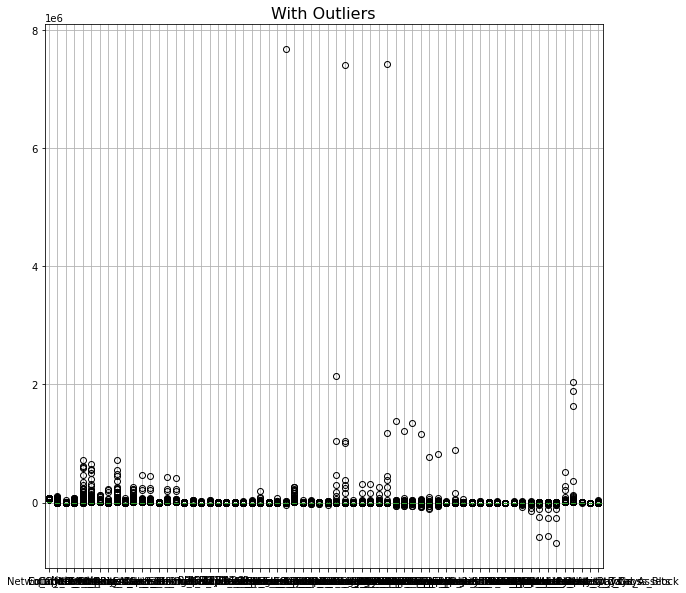

In [12]:
plt.figure(figsize=(10,10))
data[cont].boxplot(vert=1)
plt.title('With Outliers',fontsize=16)
plt.show()

There are more outliers in this dataset.

### Outliers treatment

In [13]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [14]:
for column in data[cont].columns:
    lr,ur=remove_outlier(data[column])
    data[column]=np.where(data[column]>ur,ur,data[column])
    data[column]=np.where(data[column]<lr,lr,data[column])

### After Outlier treatment checking the presence of Outliers

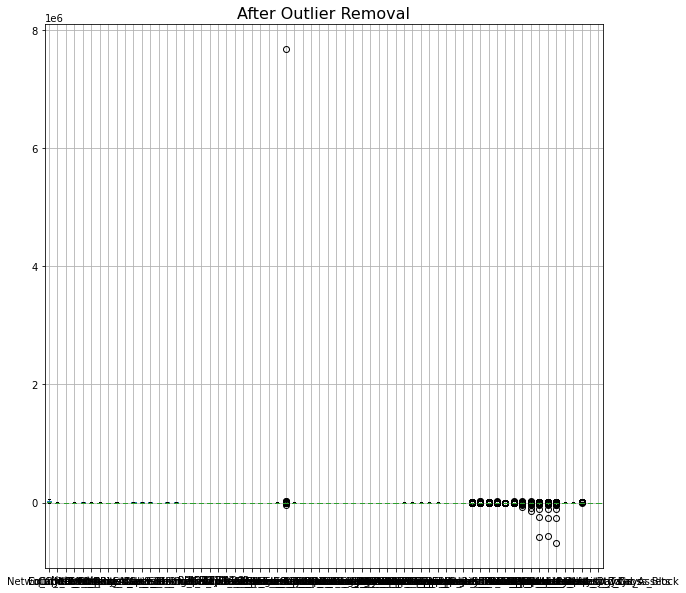

In [15]:
plt.figure(figsize=(10,10))
data[cont].boxplot(vert=1)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

Now we have removed the maximum outliers.

## Missing Value Treatment

In [16]:
data.isnull().sum()

Co_Code                                  0
Networth_Next_Year                       0
Equity_Paid_Up                           0
Networth                                 0
Capital_Employed                         0
Total_Debt                               0
Gross_Block_                             0
Net_Working_Capital_                     0
Current_Assets_                          0
Current_Liabilities_and_Provisions_      0
Total_Assets_to_Liabilities_             0
Gross_Sales                              0
Net_Sales                                0
Other_Income                             0
Value_Of_Output                          0
Cost_of_Production                       0
Selling_Cost                             0
PBIDT                                    0
PBDT                                     0
PBIT                                     0
PBT                                      0
PAT                                      0
Adjusted_PAT                             0
CP         

In [17]:
data.isnull().sum().sum()

118

### In this dataset we have 118 missing values.

### Impute missing values using median (replacement with median eliminates impact of outliers in the treatment)

In [18]:
for column in data.columns:
    if data[column].dtype != 'object':
        median = data[column].median()
        data[column] = data[column].fillna(median)    
        
data.isnull().sum()

Co_Code                                0
Networth_Next_Year                     0
Equity_Paid_Up                         0
Networth                               0
Capital_Employed                       0
Total_Debt                             0
Gross_Block_                           0
Net_Working_Capital_                   0
Current_Assets_                        0
Current_Liabilities_and_Provisions_    0
Total_Assets_to_Liabilities_           0
Gross_Sales                            0
Net_Sales                              0
Other_Income                           0
Value_Of_Output                        0
Cost_of_Production                     0
Selling_Cost                           0
PBIDT                                  0
PBDT                                   0
PBIT                                   0
PBT                                    0
PAT                                    0
Adjusted_PAT                           0
CP                                     0
Revenue_earnings

#### Now we have no missing values in this dataset after imputation.

## Transform Target variable into 0 and 1

### Creating a binary target variable using 'Networth_Next_Year' 
### Take the value of 1 when net worth next year is negative & 0 when net worth next year is positive.

In [19]:
data['default'] = np.where((data['Networth_Next_Year'] > 0), 0, 1)

In [20]:
data[['default','Networth_Next_Year']].head(10)

,default,Networth_Next_Year
0,1,-175.74
1,1,-175.74
2,1,-175.74
3,1,-175.74
4,1,-175.74
5,1,-175.74
6,1,-175.74
7,1,-175.74
8,1,-175.74
9,1,-175.74


#### What does variable 'default' look like

In [21]:
data['default'].value_counts()

0    3198
1     388
Name: default, dtype: int64

#### Checking proportion of default

In [22]:
data['default'].value_counts(normalize = True)

0   0.89
1   0.11
Name: default, dtype: float64

### Here in this dataset we have 89% who are non-defaulters and 11% defaulters.

In [23]:
data['default'].describe()

count   3586.00
mean       0.11
std        0.31
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        1.00
Name: default, dtype: float64

#### Average default rate matches with overall default rate of 11%

In [24]:
data.head()

,Co_Code,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block_,Net_Working_Capital_,Current_Assets_,Current_Liabilities_and_Provisions_,Total_Assets_to_Liabilities_,Gross_Sales,Net_Sales,Other_Income,Value_Of_Output,Cost_of_Production,Selling_Cost,PBIDT,PBDT,PBIT,PBT,PAT,Adjusted_PAT,CP,Revenue_earnings_in_forex,Revenue_expenses_in_forex,Capital_expenses_in_forex,Book_Value_Unit_Curr,Book_Value_Adj_Unit_Curr,Market_Capitalisation,CEPS_annualised_Unit_Curr,Cash_Flow_From_Operating_Activities,Cash_Flow_From_Investing_Activities,Cash_Flow_From_Financing_Activities,ROG_Net_Worth_perc,ROG_Capital_Employed_perc,ROG_Gross_Block_perc,ROG_Gross_Sales_perc,ROG_Net_Sales_perc,ROG_Cost_of_Production_perc,ROG_Total_Assets_perc,ROG_PBIDT_perc,ROG_PBDT_perc,ROG_PBIT_perc,ROG_PBT_perc,ROG_PAT_perc,ROG_CP_perc,ROG_Revenue_earnings_in_forex_perc,ROG_Revenue_expenses_in_forex_perc,ROG_Market_Capitalisation_perc,Current_Ratio_Latest,Fixed_Assets_Ratio_Latest,Inventory_Ratio_Latest,Debtors_Ratio_Latest,Total_Asset_Turnover_Ratio_Latest,Interest_Cover_Ratio_Latest,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block,default
0,16974.00,-175.74,43.17,-166.22,-320.90,180.83,328.88,-89.41,40.50,163.03,109.60,0.00,0.00,7.60,-0.07,137.67,0.00,-35.19,-19.42,-25.00,-11.28,-8.46,-8.24,-16.37,0.00,0.00,0.00,-87.59,-167.58,0.00,-13.16,-19.74,1.46,9.91,-15.31,-20.76,-9.75,0.00,0.00,1.38,-25.75,5.23,-19.29,4.43,-19.33,-19.33,-19.29,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,-0.20,0.00,0.00,0.00,0.00,0.00,0.00,0.00,45.00,0.00,0.00,1
1,21214.00,-175.74,43.17,-166.22,555.11,180.83,328.88,-89.41,332.19,163.03,760.52,603.46,583.94,9.06,587.48,472.47,9.71,58.75,-4.32,35.53,-11.28,-8.46,-8.24,-4.32,6.35,17.47,0.00,-15.18,-15.18,278.64,-0.02,32.08,-12.97,9.91,-20.76,6.30,3.17,5.92,5.92,13.16,6.66,5.24,-108.77,172.38,-9.85,-9.85,-108.77,0.00,0.00,6.61,0.08,0.25,804.44,10.35,0.30,-0.84,-10.30,-39.74,-57.74,-57.74,-87.18,29.00,101.00,2.00,0.31,0.24,1
2,14852.00,-175.74,43.17,287.41,555.11,180.83,328.88,151.52,332.19,163.03,760.52,392.13,392.13,9.06,301.16,408.51,9.71,-35.19,-19.42,-25.00,-11.28,-8.46,-8.24,-16.37,0.00,17.47,0.00,94.14,94.14,278.64,-13.16,-19.74,-12.97,9.91,-20.76,15.66,-2.07,-52.48,-52.64,-52.79,-0.78,-130.22,-155.87,-153.59,-196.02,-207.35,-153.12,0.00,0.00,-6.31,1.06,0.03,0.01,0.42,0.00,-2.21,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97.00,210.50,0.00,-0.03,-0.26,1
3,2439.00,-175.74,43.17,-166.22,555.11,180.83,328.88,-89.41,332.19,163.03,760.52,603.46,583.94,9.06,587.48,472.47,3.34,-35.19,-19.42,-25.00,-11.28,-8.46,-8.24,-16.37,0.89,17.47,0.00,-39.64,-39.64,194.27,-13.16,32.08,7.98,-15.30,-20.76,-28.47,-1.80,8.33,8.33,16.59,-10.12,-130.22,-102.72,-153.59,-80.23,-70.57,-88.52,0.00,0.00,-13.94,0.09,5.08,411.15,9.26,0.00,-0.16,-3.33,-7.21,-48.13,-47.70,-51.58,93.00,63.00,2.00,0.24,1.90,1
4,23505.00,-175.74,43.17,-166.22,555.11,180.83,328.88,151.52,332.19,163.03,760.52,38.72,38.72,9.06,38.72,186.29,1.97,-35.19,-19.42,-25.00,-11.28,-8.46,-8.24,-16.37,0.00,15.62,0.00,-87.59,-212.89,113.68,-13.16,-19.74,7.98,9.91,-20.76,-11.76,0.34,-52.48,-52.64,-48.80,-5.81,-40.07,3.28,-38.72,1.87,-2.59,-1.13,0.00,0.00,-12.91,0.50,0.05,0.02,1.28,0.01,-0.73,-295.55,-400.55,-845.88,379.79,274.79,253.00,210.50,0.00,0.01,0.05,1


## Train Test Split

## Model Building using Logistic Regression for 'Probability at default'

Now, Importing statsmodels modules

In [25]:
import statsmodels.formula.api as SM

In [26]:
X = data.drop(['default','Networth_Next_Year'], axis=1)
y = data['default']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42,stratify=data['default'])

data_train = pd.concat([X_train,y_train], axis=1)
data_test = pd.concat([X_test,y_test], axis=1)

In [27]:
data_train.head()

,Co_Code,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block_,Net_Working_Capital_,Current_Assets_,Current_Liabilities_and_Provisions_,Total_Assets_to_Liabilities_,Gross_Sales,Net_Sales,Other_Income,Value_Of_Output,Cost_of_Production,Selling_Cost,PBIDT,PBDT,PBIT,PBT,PAT,Adjusted_PAT,CP,Revenue_earnings_in_forex,Revenue_expenses_in_forex,Capital_expenses_in_forex,Book_Value_Unit_Curr,Book_Value_Adj_Unit_Curr,Market_Capitalisation,CEPS_annualised_Unit_Curr,Cash_Flow_From_Operating_Activities,Cash_Flow_From_Investing_Activities,Cash_Flow_From_Financing_Activities,ROG_Net_Worth_perc,ROG_Capital_Employed_perc,ROG_Gross_Block_perc,ROG_Gross_Sales_perc,ROG_Net_Sales_perc,ROG_Cost_of_Production_perc,ROG_Total_Assets_perc,ROG_PBIDT_perc,ROG_PBDT_perc,ROG_PBIT_perc,ROG_PBT_perc,ROG_PAT_perc,ROG_CP_perc,ROG_Revenue_earnings_in_forex_perc,ROG_Revenue_expenses_in_forex_perc,ROG_Market_Capitalisation_perc,Current_Ratio_Latest,Fixed_Assets_Ratio_Latest,Inventory_Ratio_Latest,Debtors_Ratio_Latest,Total_Asset_Turnover_Ratio_Latest,Interest_Cover_Ratio_Latest,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block,default
842,7127.00,3.25,3.49,3.54,0.05,1.53,2.94,2.98,0.05,3.59,0.42,0.42,0.00,0.42,0.25,0.01,0.15,0.14,0.03,0.02,0.01,0.01,0.13,0.00,0.00,0.00,10.74,10.74,0.00,0.40,0.04,0.00,-0.02,0.29,0.00,0.66,2.44,2.44,4.17,-2.97,-28.57,-30.00,-66.67,-75.00,-75.00,-18.75,0.00,0.00,0.00,48.77,0.26,0.00,0.00,0.11,0.00,40.00,30.00,40.00,35.00,25.00,0.00,0.00,0.00,0.11,0.26,0
1057,56129.88,4.75,5.29,5.39,0.02,0.75,3.56,3.62,0.06,5.45,1.88,1.88,0.72,1.88,1.35,0.14,0.51,0.50,0.42,0.41,0.41,0.41,0.50,0.00,0.00,0.00,11.14,11.14,0.00,1.05,-0.38,-1.25,1.64,30.64,37.22,16.80,44.62,44.62,36.36,37.21,154.73,178.18,172.38,216.75,228.97,176.53,0.00,0.00,0.00,12.29,3.32,46.61,11.17,0.77,-4.13,-1.12,-6.16,-2.61,-2.61,-7.65,8.00,13.00,7.00,0.90,4.12,0
1595,24814.00,13.06,13.50,13.50,0.00,0.00,13.47,13.62,0.15,13.65,0.12,0.12,0.75,-0.28,0.08,0.00,0.23,0.23,0.23,0.23,0.16,0.16,0.16,0.00,0.00,0.00,1.03,1.03,257.28,0.01,0.03,0.00,0.00,1.20,1.20,0.00,-29.41,-29.41,-52.79,-0.07,4.55,4.55,4.55,4.55,6.67,6.67,0.00,0.00,-31.60,6.44,0.00,2.06,1.81,0.27,0.00,1.60,1.60,1.60,1.06,1.06,253.00,0.00,326.00,0.46,0.00,0
100,4406.00,43.17,-60.79,-58.30,2.46,18.66,-84.10,7.69,91.79,33.49,0.76,0.76,0.34,0.79,0.83,0.02,-35.19,-19.42,-25.00,-11.28,-8.46,-8.24,-16.37,0.01,0.00,0.00,-8.37,-8.37,6.32,-13.16,0.02,0.00,0.00,-20.76,-28.47,0.00,-38.21,-38.21,-24.55,-28.68,-130.22,-155.87,-153.59,-196.02,-207.35,-153.12,0.00,0.00,-17.17,0.00,0.07,20.50,82.00,0.00,0.00,-73.17,-81.30,-73.17,-73.17,-81.30,253.00,15.00,69.00,0.02,0.06,1
1191,56129.88,4.00,5.95,20.62,14.33,7.76,7.38,22.22,14.83,35.45,142.80,142.80,2.64,142.80,138.75,0.58,3.63,1.70,3.02,1.09,0.73,0.73,1.34,0.00,0.00,0.00,14.87,1.49,0.00,3.35,-0.11,-0.21,-0.68,13.98,6.02,2.92,20.32,20.32,23.20,13.33,26.92,34.92,20.32,19.78,37.74,52.27,0.00,0.00,0.00,1.02,19.66,0.00,6.75,8.10,3.42,4.29,3.99,3.12,2.10,1.79,53.00,28.00,0.00,2.79,11.87,0


## Build Logistic Regression Model (using statsmodel library) on most important variables on Train Dataset and choose the optimum cutoff. Also showcase your model building approach

## Model 1

Before starting model building, lets look at the problem of multicollinearity. Multicollinearity occurs when two or more independent variables are highly correlated with one another in a regression model.

### Check Multi-collinearity using VIF

In [28]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

    return(vif)

In [29]:
calc_vif(X_train).sort_values(by='VIF', ascending = True)

,variables,VIF
27,Book_Value_Adj_Unit_Curr,1.02
49,Current_Ratio_Latest,1.03
52,Debtors_Ratio_Latest,1.04
51,Inventory_Ratio_Latest,1.05
50,Fixed_Assets_Ratio_Latest,1.09
54,Interest_Cover_Ratio_Latest,1.10
62,Inventory_Velocity_Days,1.36
35,ROG_Gross_Block_perc,1.52
48,ROG_Market_Capitalisation_perc,1.70
53,Total_Asset_Turnover_Ratio_Latest,1.79


Here, we see that the value of VIF is high for many variables. So, we may drop variables with VIF more than 5 (very high correlation) & build our model

In [30]:
f_1 = 'default ~ Book_Value_Adj_Unit_Curr + Current_Ratio_Latest + Debtors_Ratio_Latest + Inventory_Ratio_Latest + Fixed_Assets_Ratio_Latest + Interest_Cover_Ratio_Latest + Inventory_Velocity_Days + ROG_Gross_Block_perc + ROG_Market_Capitalisation_perc + Total_Asset_Turnover_Ratio_Latest + Co_Code + ROG_Cost_of_Production_perc + Creditors_Velocity_Days + Debtors_Velocity_Days + Cash_Flow_From_Investing_Activities + Value_of_Output_to_Gross_Block + Cash_Flow_From_Financing_Activities + ROG_Net_Worth_perc + Revenue_earnings_in_forex + ROG_Total_Assets_perc + Revenue_expenses_in_forex + ROG_Capital_Employed_perc + Cash_Flow_From_Operating_Activities + Value_of_Output_to_Total_Assets + Equity_Paid_Up + Other_Income + Market_Capitalisation + Selling_Cost'

### Fitting the Logistic Regression Model

In [31]:
model_1 = SM.logit(formula = f_1, data=data).fit()

Optimization terminated successfully.
         Current function value: 0.172947
         Iterations 16


### Studying whether this equation is significant or not

In [32]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 3586
Model:                          Logit   Df Residuals:                     3557
Method:                           MLE   Df Model:                           28
Date:                Sun, 15 May 2022   Pseudo R-squ.:                  0.4954
Time:                        19:36:18   Log-Likelihood:                -620.19
converged:                       True   LL-Null:                       -1229.0
Covariance Type:            nonrobust   LLR p-value:                9.843e-239
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -0.9914      0.168     -5.887      0.000      -1.321      -0.661
Book_Value_Adj_Unit_Curr               -0.0616      0.005    -12.869      0.000      -0.071      -0.052
Current_Ratio_Latest                   -0.0211      0.009     -2.483      0.013      -0.038      -0.004
Debtors_Ratio_Latest                   -0.0015      0.002     -0.881      0.378      -0.005       0.002
Inventory_Ratio_Latest                 -0.0003      0.001     -0.501      0.616      -0.002       0.001
Fixed_Assets_Ratio_Latest              -0.0008      0.001     -0.752      0.452      -0.003       0.001
Interest_Cover_Ratio_Latest            -0.0009      0.000     -1.925      0.054      -0.002    1.56e-05
Inventory_Velocity_Days             -2.181e-05      0.001     -0.043      0.966      -0.001       0.001
ROG_Gross_Block_perc                   -0.0125      0.013     -0.961      0.337      -0.038       0.013
ROG_Market_Capitalisation_perc         -0.0012      0.002     -0.660      0.509      -0.005       0.002
Total_Asset_Turnover_Ratio_Latest       0.0384      0.031      1.232      0.218      -0.023       0.099
Co_Code                             -2.897e-05   6.84e-06     -4.238      0.000   -4.24e-05   -1.56e-05
ROG_Cost_of_Production_perc            -0.0051      0.002     -2.248      0.025      -0.010      -0.001
Creditors_Velocity_Days                 0.0022      0.001      2.204      0.028       0.000       0.004
Debtors_Velocity_Days                  -0.0026      0.001     -2.879      0.004      -0.004      -0.001
Cash_Flow_From_Investing_Activities     0.0040      0.025      0.159      0.874      -0.046       0.054
Value_of_Output_to_Gross_Block         -0.1131      0.033     -3.402      0.001      -0.178      -0.048
Cash_Flow_From_Financing_Activities     0.0162      0.023      0.718      0.473      -0.028       0.061
ROG_Net_Worth_perc                     -0.0425      0.007     -6.162      0.000      -0.056      -0.029
Revenue_earnings_in_forex              -0.0145      0.019     -0.751      0.453      -0.052       0.023
ROG_Total_Assets_perc                  -0.0093      0.007     -1.347      0.178      -0.023       0.004
Revenue_expenses_in_forex               0.0445      0.021      2.156      0.031       0.004       0.085
ROG_Capital_Employed_perc               0.0047      0.007      0.683      0.495      -0.009       0.018
Cash_Flow_From_Operating_Activities    -0.0097      0.013     -0.754      0.451      -0.035       0.016
Value_of_Output_to_Total_Assets        -0.0507      0.152     -0.333      0.739      -0.349       0.247
Equity_Paid_Up                          0.0123      0.007      1.715      0.086      -0.002       0.026
Other_Income                            0.0760      0.037      2.064      0.039       0.004       0.148
Market_Capitalisation                  -0.0051      0.002     -3.224      0.001      -0.008      -0.002
Selling_Cost     

We can see that few variables are insignificant & may not be useful to discriminate cases of deault

Let us look at the adjusted pseudo R-square value

In [33]:
print('The adjusted pseudo R-square value is',1 - ((model_1.llf - model_1.df_model)/model_1.llnull))

The adjusted pseudo R-square value is 0.4726061305575755


Adjusted pseudo R-square seems to be lower than Pseudo R-square value which means there are insignificant variables present in the model. Lets try & remove variables whose p value is greater than 0.05 & rebuild our model

## Model 2

In [34]:
f_2 = 'default ~ Book_Value_Adj_Unit_Curr + Current_Ratio_Latest +  Co_Code + ROG_Cost_of_Production_perc + Creditors_Velocity_Days + Debtors_Velocity_Days + Value_of_Output_to_Gross_Block + ROG_Net_Worth_perc + Revenue_expenses_in_forex + Other_Income + Market_Capitalisation'

In [35]:
model_2 = SM.logit(formula = f_2, data=data).fit()

Optimization terminated successfully.
         Current function value: 0.175683
         Iterations 16


In [36]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 3586
Model:                          Logit   Df Residuals:                     3574
Method:                           MLE   Df Model:                           11
Date:                Sun, 15 May 2022   Pseudo R-squ.:                  0.4874
Time:                        19:36:19   Log-Likelihood:                -630.00
converged:                       True   LL-Null:                       -1229.0
Covariance Type:            nonrobust   LLR p-value:                4.211e-250
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -0.9455      0.143     -6.622      0.000      -1.225      -0.666
Book_Value_Adj_Unit_Curr          -0.0629      0.005    -13.245      0.000      -0.072      -0.054
Current_Ratio_Latest              -0.0196      0.008     -2.362      0.018      -0.036      -0.003
Co_Code                        -2.825e-05   6.64e-06     -4.253      0.000   -4.13e-05   -1.52e-05
ROG_Cost_of_Production_perc       -0.0058      0.002     -2.608      0.009      -0.010      -0.001
Creditors_Velocity_Days            0.0023      0.001      2.387      0.017       0.000       0.004
Debtors_Velocity_Days             -0.0022      0.001     -2.572      0.010      -0.004      -0.001
Value_of_Output_to_Gross_Block    -0.1196      0.029     -4.141      0.000      -0.176      -0.063
ROG_Net_Worth_perc                -0.0461      0.006     -7.843      0.000      -0.058      -0.035
Revenue_expenses_in_forex          0.0294      0.016      1.796      0.072      -0.003       0.061
Other_Income                       0.0808      0.033      2.458      0.014       0.016       0.145
Market_Capitalisation             -0.0052      0.001     -3.664      0.000      -0.008      -0.002
==================================================================================================

Possibly complete quasi-separation: A fraction 0.17 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Still We can see that one variable is insignificant & may not be useful to discriminate cases of default

Let us look at the adjusted pseudo R-square value

In [37]:
print('The adjusted pseudo R-square value is',1 - ((model_2.llf - model_2.df_model)/model_2.llnull))

The adjusted pseudo R-square value is 0.47845318342893517


Adjusted pseudo R-square seems to be lower than Pseudo R-square value which means there are insignificant variables present in the model. Lets try & remove variables whose p value is greater than 0.05 & rebuild our model

## Model 3

In [38]:
f_3 = 'default ~ Book_Value_Adj_Unit_Curr + Current_Ratio_Latest +  Co_Code + ROG_Cost_of_Production_perc + Creditors_Velocity_Days + Debtors_Velocity_Days + Value_of_Output_to_Gross_Block + ROG_Net_Worth_perc + Other_Income + Market_Capitalisation'

In [39]:
model_3 = SM.logit(formula = f_3, data=data).fit()

Optimization terminated successfully.
         Current function value: 0.176125
         Iterations 16


In [40]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 3586
Model:                          Logit   Df Residuals:                     3575
Method:                           MLE   Df Model:                           10
Date:                Sun, 15 May 2022   Pseudo R-squ.:                  0.4861
Time:                        19:36:19   Log-Likelihood:                -631.58
converged:                       True   LL-Null:                       -1229.0
Covariance Type:            nonrobust   LLR p-value:                1.808e-250
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -0.9220      0.142     -6.507      0.000      -1.200      -0.644
Book_Value_Adj_Unit_Curr          -0.0620      0.005    -13.191      0.000      -0.071      -0.053
Current_Ratio_Latest              -0.0206      0.008     -2.452      0.014      -0.037      -0.004
Co_Code                        -2.807e-05    6.6e-06     -4.255      0.000    -4.1e-05   -1.51e-05
ROG_Cost_of_Production_perc       -0.0059      0.002     -2.655      0.008      -0.010      -0.002
Creditors_Velocity_Days            0.0022      0.001      2.291      0.022       0.000       0.004
Debtors_Velocity_Days             -0.0023      0.001     -2.628      0.009      -0.004      -0.001
Value_of_Output_to_Gross_Block    -0.1167      0.029     -4.091      0.000      -0.173      -0.061
ROG_Net_Worth_perc                -0.0466      0.006     -7.933      0.000      -0.058      -0.035
Other_Income                       0.0971      0.031      3.092      0.002       0.036       0.159
Market_Capitalisation             -0.0044      0.001     -3.317      0.001      -0.007      -0.002
==================================================================================================

Possibly complete quasi-separation: A fraction 0.17 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

We can see that all variables are significant & may be useful to discriminate cases of default

Let us also check the multicollinearity of the model using Variance Inflation Factor (VIF) for the predictor variables

In [41]:
calc_vif(X_train[['Book_Value_Adj_Unit_Curr', 'Current_Ratio_Latest','Co_Code','ROG_Cost_of_Production_perc','Creditors_Velocity_Days','Debtors_Velocity_Days','Value_of_Output_to_Gross_Block','ROG_Net_Worth_perc','Other_Income','Market_Capitalisation']]).sort_values(by='VIF', ascending = True)

,variables,VIF
0,Book_Value_Adj_Unit_Curr,1.00
1,Current_Ratio_Latest,1.01
3,ROG_Cost_of_Production_perc,1.16
7,ROG_Net_Worth_perc,1.33
2,Co_Code,1.70
6,Value_of_Output_to_Gross_Block,1.74
5,Debtors_Velocity_Days,2.00
4,Creditors_Velocity_Days,2.00
8,Other_Income,2.45
9,Market_Capitalisation,2.46


We can see that multicollinearity still exists but lets not drop them as VIFs are not very high

In [42]:
print('The adjusted pseudo R-square value is',1 - ((model_3.llf - model_3.df_model)/model_3.llnull))

The adjusted pseudo R-square value is 0.47797807541693305


We see that adjusted Rsq is now close to Rsq, thus suggesting lesser insignificant variables in the model

We also notice that current model has no insignificant variables and can be used for prediction purposes.

Lets test the prediction of this model on train and test dataset

## Prediction on the Data

Let us first check the distribution plot of the logit function values

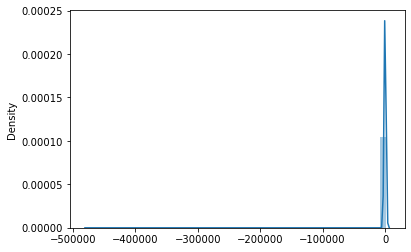

In [43]:
sns.distplot(model_3.fittedvalues);

Now, let us see the predicted probability values:

### Prediction on Train set

In [44]:
y_predict_train_LR = model_3.predict(X_train)
y_predict_train_LR

842    0.05
1057   0.00
1595   0.04
100    0.51
1191   0.01
2163   0.00
2763   0.01
2701   0.00
2072   0.06
2349   0.01
1392   0.01
1621   0.03
1960   0.00
2148   0.00
571    0.00
1984   0.13
1592   0.01
3110   0.00
1564   0.00
2155   0.43
2905   0.00
2178   0.02
1842   0.18
297    0.55
1988   0.00
3061   0.30
1471   0.01
1425   0.01
3015   0.00
182    0.57
949    0.24
1122   0.00
2082   0.00
3010   0.33
3077   0.00
2713   0.00
1232   0.00
1175   0.00
21     0.99
329    0.20
1569   0.17
1219   0.00
2591   0.00
3205   0.00
3415   0.00
3481   0.01
69     1.00
1537   0.01
3153   0.00
231    1.00
1353   0.09
701    0.08
2673   0.00
2797   0.07
2431   0.02
2754   0.04
1311   0.05
3286   0.00
3283   0.00
400    0.08
1139   0.01
1286   0.06
1498   0.00
3471   0.00
3176   0.01
1733   0.06
731    0.01
1243   0.30
2020   0.05
1798   0.07
85     0.11
2552   0.00
627    0.00
972    0.06
288    0.24
835    0.01
3082   0.00
896    0.00
2551   0.00
1394   0.02
738    0.14
102    0.64
793    0.04
177 

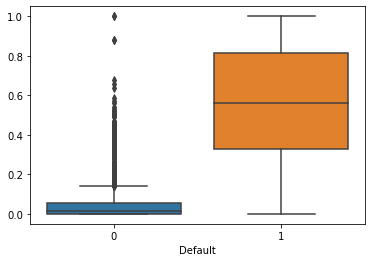

In [45]:
sns.boxplot(x=data['default'],y=y_predict_train_LR)
plt.xlabel('Default');

From the above boxplot, we need to decide on one such value of a cut-off which will give us the most reasonable descriptive power of the model. Let us take a cut-off of 0.07 and check.

Let us now see the predicted classes

In [46]:
y_class_pred_train=[]
for i in range(0,len(y_predict_train_LR)):
    if np.array(y_predict_train_LR)[i]>0.07:
        a=1
    else:
        a=0
    y_class_pred_train.append(a)

### Checking the accuracy of the model using confusion matrix for training set

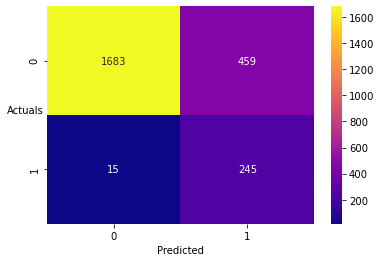

In [47]:
#print(metrics.confusion_matrix(y_test, y_predict))
sns.heatmap((metrics.confusion_matrix(y_train,y_class_pred_train)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [48]:
tn, fp, fn, tp = metrics.confusion_matrix(y_train,y_class_pred_train).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

True Negative: 1683 
False Positives: 459 
False Negatives: 15 
True Positives: 245


### Let us now go ahead and print the classification report to check the various other parameters

In [49]:
print(metrics.classification_report(y_train,y_class_pred_train,digits=3))

              precision    recall  f1-score   support

           0      0.991     0.786     0.877      2142
           1      0.348     0.942     0.508       260

    accuracy                          0.803      2402
   macro avg      0.670     0.864     0.692      2402
weighted avg      0.922     0.803     0.837      2402



* As observed above, accuracy of the model i.e. %overall correct predictions is 80%

* Sensitivity of the model is 94% i.e. 94% of those defaulted were correctly identified as defaulters by the model.

### Let us take a cut-off of 0.08 and check if our predictions have improved

In [50]:
y_class_pred_train=[]
for i in range(0,len(y_predict_train_LR)):
    if np.array(y_predict_train_LR)[i]>0.08:
        a=1
    else:
        a=0
    y_class_pred_train.append(a)

### Checking the accuracy of the model using confusion matrix for training set

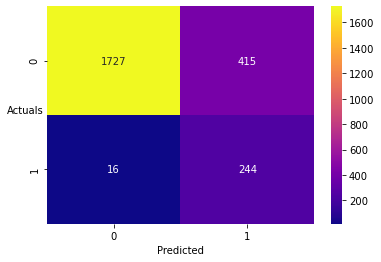

In [51]:
#print(metrics.confusion_matrix(y_test, y_predict))
sns.heatmap((metrics.confusion_matrix(y_train,y_class_pred_train)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [52]:
tn, fp, fn, tp = metrics.confusion_matrix(y_train,y_class_pred_train).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

True Negative: 1727 
False Positives: 415 
False Negatives: 16 
True Positives: 244


### Let us now go ahead and print the classification report to check the various other parameters

In [53]:
print(metrics.classification_report(y_train,y_class_pred_train,digits=3))

              precision    recall  f1-score   support

           0      0.991     0.806     0.889      2142
           1      0.370     0.938     0.531       260

    accuracy                          0.821      2402
   macro avg      0.681     0.872     0.710      2402
weighted avg      0.924     0.821     0.850      2402



Accuracy of the model i.e. %overall correct predictions has increased from 80% to 82% but sensitivity of the model is still same 94%.

## Validate the Model on Test Dataset and state the performance matrices. Also state interpretation from the model

### Prediction on Test set

In [54]:
y_predict_test_LR = model_3.predict(X_test)
y_predict_test_LR

251    0.49
3493   0.00
3063   0.00
2384   0.01
1679   0.02
604    0.00
3434   0.00
2244   0.00
2523   0.00
2162   0.00
3102   0.00
1638   0.18
2046   0.00
1241   0.12
133    0.12
2294   0.01
2139   0.00
2844   0.08
1360   0.04
2896   0.00
407    0.46
1270   0.02
2021   0.05
1380   0.00
2938   0.01
2623   0.23
2992   0.00
1157   0.00
1036   0.03
1961   0.05
1700   0.01
283    0.53
3122   0.03
3533   0.00
655    0.11
3327   0.00
1127   0.01
2051   0.03
40     0.98
1536   0.00
1154   0.03
373    0.42
2081   0.01
3453   0.00
2873   0.02
3120   0.00
3279   0.03
1644   0.00
2318   0.00
2820   0.00
1735   0.10
1221   0.06
3165   0.03
1983   0.00
2892   0.00
454    0.53
2838   0.00
86     0.61
1741   0.10
723    0.17
1026   0.05
911    0.00
1266   0.03
2776   0.00
3000   0.01
761    0.00
92     1.00
2815   0.06
2209   0.01
611    0.07
3309   0.00
3245   0.00
622    0.00
2161   0.00
2668   0.00
3038   0.00
2705   0.00
725    0.00
2749   0.08
2440   0.06
3380   0.03
2287   0.06
2843   0.00
3185

Here we have taken cut-off 0.07

In [55]:
y_class_pred_test=[]
for i in range(0,len(y_predict_test_LR)):
    if np.array(y_predict_test_LR)[i]>0.07:
        a=1
    else:
        a=0
    y_class_pred_test.append(a)

### Checking the accuracy of the model using confusion matrix for test set

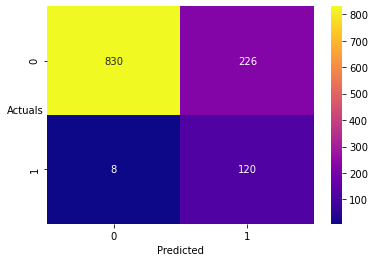

In [56]:
#print(metrics.confusion_matrix(y_test, y_predict))
sns.heatmap((metrics.confusion_matrix(y_test,y_class_pred_test)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [57]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test,y_class_pred_test).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

True Negative: 830 
False Positives: 226 
False Negatives: 8 
True Positives: 120


### Let us now go ahead and print the classification report to check the various other parameters

In [58]:
print(metrics.classification_report(y_test,y_class_pred_test,digits=3))

              precision    recall  f1-score   support

           0      0.990     0.786     0.876      1056
           1      0.347     0.938     0.506       128

    accuracy                          0.802      1184
   macro avg      0.669     0.862     0.691      1184
weighted avg      0.921     0.802     0.836      1184



* As observed above, accuracy of the model i.e. %overall correct predictions is 80%
* Sensitivity of the model is 94% i.e. 94% of those defaulted were correctly identified as defaulters by the model

### Let us take a cut-off of 0.08 and check if our predictions have improved

In [59]:
y_class_pred_test=[]
for i in range(0,len(y_predict_test_LR)):
    if np.array(y_predict_test_LR)[i]>0.08:
        a=1
    else:
        a=0
    y_class_pred_test.append(a)

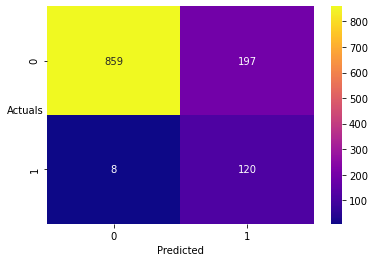

In [60]:
#print(metrics.confusion_matrix(y_test, y_predict))
sns.heatmap((metrics.confusion_matrix(y_test,y_class_pred_test)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [61]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test,y_class_pred_test).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

True Negative: 859 
False Positives: 197 
False Negatives: 8 
True Positives: 120


### Let us now go ahead and print the classification report to check the various other parameters

In [62]:
print(metrics.classification_report(y_test,y_class_pred_test,digits=3))

              precision    recall  f1-score   support

           0      0.991     0.813     0.893      1056
           1      0.379     0.938     0.539       128

    accuracy                          0.827      1184
   macro avg      0.685     0.875     0.716      1184
weighted avg      0.925     0.827     0.855      1184



Accuracy of the model i.e. %overall correct predictions has increased from 80% to 83% & sensitivity of the model stands at 94%

We may choose cutoff of 0.08 as it gave higher model sensitivity & overall accuracy of the model in test dataset

## 1.8 Build a Random Forest Model on Train Dataset. Also showcase your model building approach

In [63]:
RF_model=RandomForestClassifier(n_estimators=100,random_state=42)
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [64]:
y_train_predict_RF = RF_model.predict(X_train)
model_score_RF =RF_model.score(X_train, y_train)
print(model_score_RF)
print(metrics.confusion_matrix(y_train, y_train_predict_RF))
print(metrics.classification_report(y_train, y_train_predict_RF))

1.0
[[2142    0]
 [   0  260]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2142
           1       1.00      1.00      1.00       260

    accuracy                           1.00      2402
   macro avg       1.00      1.00      1.00      2402
weighted avg       1.00      1.00      1.00      2402



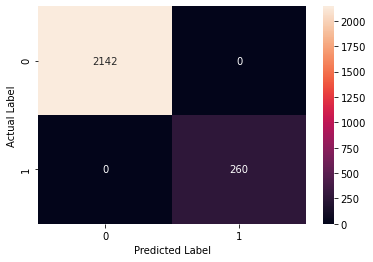

In [65]:
sns.heatmap(confusion_matrix(y_train, y_train_predict_RF),annot=True,fmt='d',cbar=True)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

When we verified the dataset using Random Forest it gives 100% accuracy which is a very good model in Train Dataset

## 1.9 Validate the Random Forest Model on test Dataset and state the performance matrices. Also state interpretation from the model

In [66]:
y_test_predict_RF = RF_model.predict(X_test)
model_score_RF = RF_model.score(X_test, y_test)
print(model_score_RF)
print(metrics.confusion_matrix(y_test, y_test_predict_RF))
print(metrics.classification_report(y_test, y_test_predict_RF))

0.981418918918919
[[1052    4]
 [  18  110]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1056
           1       0.96      0.86      0.91       128

    accuracy                           0.98      1184
   macro avg       0.97      0.93      0.95      1184
weighted avg       0.98      0.98      0.98      1184



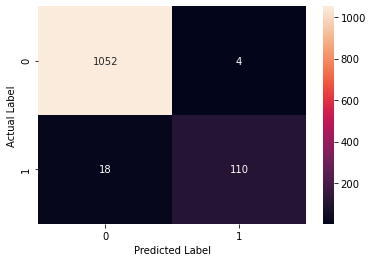

In [67]:
sns.heatmap(confusion_matrix(y_test, y_test_predict_RF),annot=True,fmt='d',cbar=True)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

When we verified the dataset using Random Forest on Test, it gives 98.22% accuracy which is a very good fit model.

#### Overall we confirm that this is a good fit model checking all metrics.

## 1.10 Build a LDA Model on Train Dataset. Also showcase your model building approach

In [68]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()

In [69]:
model_LDA=clf.fit(X_train,y_train) ## Fitting the model
model_LDA

LinearDiscriminantAnalysis()

In [70]:
y_train_predict_LDA = model_LDA.predict(X_train)
model_score =model_LDA.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict_LDA))
print(metrics.classification_report(y_train, y_train_predict_LDA))

0.9283930058284763
[[2122   20]
 [ 152  108]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      2142
           1       0.84      0.42      0.56       260

    accuracy                           0.93      2402
   macro avg       0.89      0.70      0.76      2402
weighted avg       0.92      0.93      0.92      2402



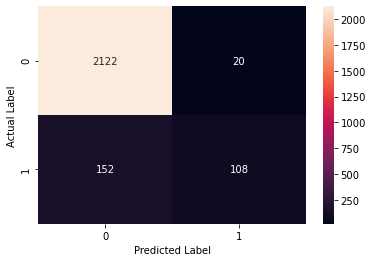

In [71]:
sns.heatmap(confusion_matrix(y_train, y_train_predict_LDA),annot=True,fmt='d',cbar=True)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

#### When we verified the dataset using LDA on Train data, it gives 92.83% accuracy which is a very good model.

## 1.11 Validate the LDA Model on test Dataset and state the performance matrices. Also state interpretation from the model

In [72]:
ytest_predict_LDA = model_LDA.predict(X_test)
model_score = model_LDA.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, ytest_predict_LDA))
print(metrics.classification_report(y_test, ytest_predict_LDA))

0.9231418918918919
[[1039   17]
 [  74   54]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.96      1056
           1       0.76      0.42      0.54       128

    accuracy                           0.92      1184
   macro avg       0.85      0.70      0.75      1184
weighted avg       0.91      0.92      0.91      1184



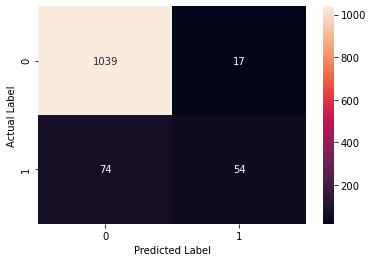

In [73]:
sns.heatmap(confusion_matrix(y_test, ytest_predict_LDA),annot=True,fmt='d',cbar=True)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

When we verified the dataset using LDA on Test data, it gives 92.31% accuracy which is a very good model.

### Overall we confirm that this is a good fit model checking all metrics.

## 1.12 Compare the performances of Logistics, Random Forest and LDA models (include ROC Curve)

### Logistic Regression

### Performance Matrix on train data set

In [74]:
print('Confusion Matrix','\n',metrics.confusion_matrix(y_train, y_class_pred_train),'\n')
print('Classification Report','\n',metrics.classification_report(y_train, y_class_pred_train))

Confusion Matrix 
 [[1727  415]
 [  16  244]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.99      0.81      0.89      2142
           1       0.37      0.94      0.53       260

    accuracy                           0.82      2402
   macro avg       0.68      0.87      0.71      2402
weighted avg       0.92      0.82      0.85      2402



### Performance Matrix on test data set

In [75]:
print('Confusion Matrix','\n',metrics.confusion_matrix(y_test, y_class_pred_test),'\n')
print('Classification Report','\n',metrics.classification_report(y_test, y_class_pred_test))

Confusion Matrix 
 [[859 197]
 [  8 120]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.99      0.81      0.89      1056
           1       0.38      0.94      0.54       128

    accuracy                           0.83      1184
   macro avg       0.68      0.88      0.72      1184
weighted avg       0.92      0.83      0.86      1184



### AUC and ROC curve for Train Data - Logistic Regression

AUC 0.872 


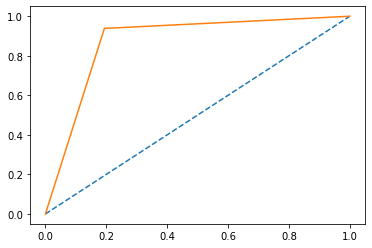

In [76]:
# ytrain_predict_probLR = model_3.predict_proba(X_train)
# ytrain_predict_probLR=ytrain_predict_probLR[:, 1]
auc=roc_auc_score(y_train,y_class_pred_train)
print("AUC %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(y_train,y_class_pred_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr);

#### AUC score for Test data in Logistic Regression is 87.2%

### AUC and ROC curve for Test Data - Logistic Regression

AUC 0.875 


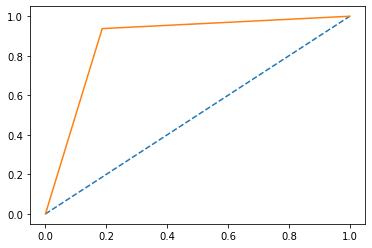

In [77]:
# ytest_predict_probLR = model_LR.predict_proba(X_test)
# ytest_predict_probLR=ytest_predict_probLR[:,1]
auc=roc_auc_score(y_test,y_class_pred_test)
print("AUC %.3f " % auc)

test_fpr,test_tpr,test_threshold=roc_curve(y_test,y_class_pred_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)

#### AUC score for Test data in Logistic Regression is 87.5%

Overall for Logistic Regression it's a good model.

### Logistic Regression using sklearn

In [78]:
from sklearn.linear_model import LogisticRegression  

model_LR = LogisticRegression(solver='newton-cg',max_iter=1000,penalty='none',verbose=True,n_jobs=2)
model_LR.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:  1.4min finished


LogisticRegression(max_iter=1000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [79]:
# Accuracy - Training Data
model_score_train = model_LR.score(X_train, y_train)
print("Accuracy for Train Data: ",model_score_train)

Accuracy for Train Data:  0.9554537885095754


In [80]:
ytrain_predict_LR = model_LR.predict(X_train)
ytest_predict_LR = model_LR.predict(X_test)
model_score_test = model_LR.score(X_test, y_test)
print("Accuracy for Test Data: ",model_score_test)

Accuracy for Test Data:  0.9442567567567568


### Probabilities on Train and Test data

In [81]:
ytrain_predict_probLR = model_LR.predict_proba(X_train)
ytest_predict_probLR = model_LR.predict_proba(X_test)

### Confusion Matrix for Train data

In [82]:
print('Confusion Matrix','\n',metrics.confusion_matrix(y_train, ytrain_predict_LR),'\n')
print('Classification Report','\n',metrics.classification_report(y_train, ytrain_predict_LR))

Confusion Matrix 
 [[2121   21]
 [  86  174]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      2142
           1       0.89      0.67      0.76       260

    accuracy                           0.96      2402
   macro avg       0.93      0.83      0.87      2402
weighted avg       0.95      0.96      0.95      2402



### Confusion Matrix for Test data

In [83]:
print('Confusion Matrix','\n',metrics.confusion_matrix(y_test, ytest_predict_LR),'\n')
print('Classification Report','\n',metrics.classification_report(y_test, ytest_predict_LR))

Confusion Matrix 
 [[1038   18]
 [  48   80]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      1056
           1       0.82      0.62      0.71       128

    accuracy                           0.94      1184
   macro avg       0.89      0.80      0.84      1184
weighted avg       0.94      0.94      0.94      1184



### AUC and ROC curve for Train and Test Data

AUC 0.973 


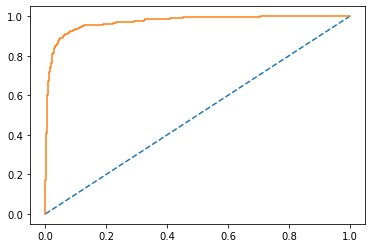

In [84]:
ytrain_predict_probLR = model_LR.predict_proba(X_train)
ytrain_predict_probLR = ytrain_predict_probLR[:, 1]
auc=roc_auc_score(y_train,ytrain_predict_probLR)
print("AUC %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(y_train,ytrain_predict_probLR)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr);

#### AUC score for Train data in Logistic Regression is 97.3%

Overall for Logistic Regression it's a good model.

AUC 0.957 


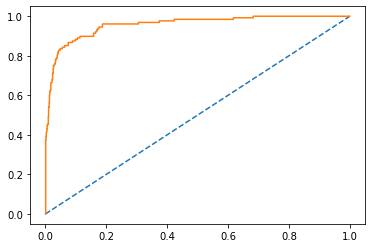

In [85]:
ytest_predict_probLR = model_LR.predict_proba(X_test)
ytest_predict_probLR = ytest_predict_probLR[:,1]
auc=roc_auc_score(y_test,ytest_predict_probLR)
print("AUC %.3f " % auc)
test_fpr,test_tpr,test_threshold=roc_curve(y_test,ytest_predict_probLR)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)

#### AUC score for Test data in Logistic Regression is 95.7%

Overall for Logistic Regression it's a good model.

### Random Forest

### Performance Matrix on train data set

In [86]:
print('Confusion Matrix','\n',metrics.confusion_matrix(y_train, y_train_predict_RF),'\n')
print('Classification Report','\n',metrics.classification_report(y_train, y_train_predict_RF))

Confusion Matrix 
 [[2142    0]
 [   0  260]] 

Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2142
           1       1.00      1.00      1.00       260

    accuracy                           1.00      2402
   macro avg       1.00      1.00      1.00      2402
weighted avg       1.00      1.00      1.00      2402



### Performance Matrix on test data set

In [87]:
print('Confusion Matrix','\n',metrics.confusion_matrix(y_test, y_test_predict_RF),'\n')
print('Classification Report','\n',metrics.classification_report(y_test, y_test_predict_RF))

Confusion Matrix 
 [[1052    4]
 [  18  110]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1056
           1       0.96      0.86      0.91       128

    accuracy                           0.98      1184
   macro avg       0.97      0.93      0.95      1184
weighted avg       0.98      0.98      0.98      1184



### AUC and ROC curve for Train Data - Random Forest

AUC 1.000 


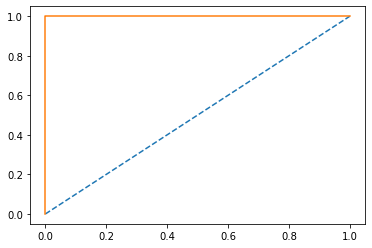

In [88]:
ytrain_predict_probRF = RF_model.predict_proba(X_train)
ytrain_predict_probRF=ytrain_predict_probRF[:, 1]
auc=roc_auc_score(y_train,ytrain_predict_probRF)
print("AUC %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(y_train,ytrain_predict_probRF)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr);

#### AUC score for Test data in Random Forest is 100%

### AUC and ROC curve for Test Data - Random Forest

AUC 0.987 


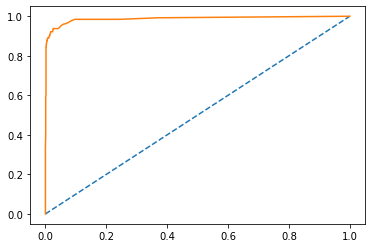

In [89]:
ytest_predict_probRF = RF_model.predict_proba(X_test)
ytest_predict_probRF=ytest_predict_probRF[:,1]
auc=roc_auc_score(y_test,ytest_predict_probRF)
print("AUC %.3f " % auc)
test_fpr,test_tpr,test_threshold=roc_curve(y_test,ytest_predict_probRF)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)

#### AUC score for Test data in Random Forest is 98.9%

Overall for Random Forest it's a good model.

### LDA

### Performance Matrix on train data set

In [90]:
print('Confusion Matrix','\n',metrics.confusion_matrix(y_train, y_train_predict_LDA),'\n')
print('Classification Report','\n',metrics.classification_report(y_train, y_train_predict_LDA))

Confusion Matrix 
 [[2122   20]
 [ 152  108]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      2142
           1       0.84      0.42      0.56       260

    accuracy                           0.93      2402
   macro avg       0.89      0.70      0.76      2402
weighted avg       0.92      0.93      0.92      2402



### Performance Matrix on test data set

In [91]:
print('Confusion Matrix','\n',metrics.confusion_matrix(y_test, ytest_predict_LDA),'\n')
print('Classification Report','\n',metrics.classification_report(y_test, ytest_predict_LDA))

Confusion Matrix 
 [[1039   17]
 [  74   54]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.98      0.96      1056
           1       0.76      0.42      0.54       128

    accuracy                           0.92      1184
   macro avg       0.85      0.70      0.75      1184
weighted avg       0.91      0.92      0.91      1184



### AUC and ROC curve for Train Data - LDA

AUC 0.948 


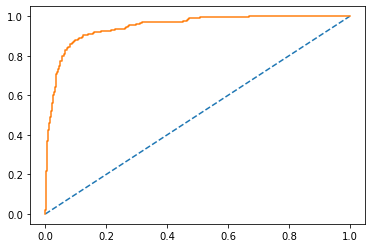

In [92]:
ytrain_predict_probLDA = model_LDA.predict_proba(X_train)
ytrain_predict_probLDA=ytrain_predict_probLDA[:, 1]
auc=roc_auc_score(y_train,ytrain_predict_probLDA)
print("AUC %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(y_train,ytrain_predict_probLDA)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr);

#### AUC score for Test data in LDA is 94.8%

### AUC and ROC curve for Test Data - LDA

AUC 0.929 


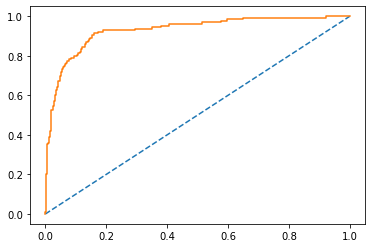

In [93]:
ytest_predict_probLDA = model_LDA.predict_proba(X_test)
ytest_predict_probLDA=ytest_predict_probLDA[:,1]
auc=roc_auc_score(y_test,ytest_predict_probLDA)
print("AUC %.3f " % auc)
test_fpr,test_tpr,test_threshold=roc_curve(y_test,ytest_predict_probLDA)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)

#### AUC score for Test data in LDA is 92.9%

Overall for LDA it's a good model.

### Comparison of all models

#### Logistic Regression

Train AUC - 0.872

Test AUC - 0.875

#### Random Forest

Train AUC - 1.00

Test AUC - 0.989

#### LDA

Train AUC - 0.948

Test AUC - 0.929


#### After analysis of AUC score for Train and Test Data, Random Forest performed well and is a good fit model.

## 1.13 State Recommendations from the above models

- Rate of Growth based on Cost of Production is positive for non-defaulters and negative for defaulters. So we can easily identify the comparison between them. So based on it we can reduce the number of defaulters.
- Rate of Growth Net worth perc is also same as Rate of Growth on Cost of Production.
- Market_Capitalisation for non-defaulters is very high compared to defaulters.
- Creditors_Velocity_Days is less for non-defaulters compared to defaulters.
- Debtors_Velocity_Days is same for both non-defaulters and defaulters.

## Market Risk Dataset

### You are expected to do the Market Risk Analysis using Python. 

In [94]:
from scipy.stats import norm 
from tabulate import tabulate

from iexfinance.stocks import get_historical_data
from iexfinance.stocks import Stock
from datetime import datetime

In [95]:
stock_prices = pd.read_csv('Market+Risk+Dataset.csv')

#Glimpse of Data
stock_prices.head()

,Date,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243


In [96]:
print('The number of rows (observations) is',stock_prices.shape[0],'\n''The number of columns (variables) is',stock_prices.shape[1])

The number of rows (observations) is 314 
The number of columns (variables) is 11


### Fixing messy column names (containing spaces) for ease of use

In [97]:
stock_prices.columns = stock_prices.columns.str.replace(' ', '_').str.replace('&','_')

In [98]:
stock_prices.head()

,Date,Infosys,Indian_Hotel,Mahindra___Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243


In [99]:
stock_prices.tail()

,Date,Infosys,Indian_Hotel,Mahindra___Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
309,02-03-2020,729,120,469,658,33,23110,401,146,3,22
310,09-03-2020,634,114,427,569,30,21308,384,121,6,18
311,16-03-2020,577,90,321,428,27,18904,365,105,3,16
312,23-03-2020,644,75,293,360,21,17666,338,89,3,14
313,30-03-2020,633,75,284,379,23,17546,352,82,3,14


In [100]:
stock_prices.describe()

,Infosys,Indian_Hotel,Mahindra___Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
count,314.00,314.00,314.00,314.00,314.00,314.00,314.00,314.00,314.00,314.00
mean,511.34,114.56,636.68,540.74,59.10,14806.41,633.47,147.63,53.71,372.66
std,135.95,22.51,102.88,115.84,15.81,4288.28,171.86,65.88,31.25,202.26
min,234.00,64.00,284.00,263.00,21.00,5543.00,338.00,53.00,3.00,14.00
25%,424.00,96.00,572.00,470.50,47.00,10952.25,478.50,88.25,25.25,243.25
50%,466.50,115.00,625.00,528.00,57.00,16018.50,614.00,142.50,53.00,376.00
75%,630.75,134.00,678.00,605.25,71.75,17773.25,785.00,182.75,82.00,534.00
max,810.00,157.00,956.00,808.00,104.00,24806.00,1089.00,338.00,117.00,871.00


Standard deviation is high for Shree_Cement and low for SAIL.

Mean and Median are almost same for all but different for except few columns.

In [101]:
stock_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 314 non-null    object
 1   Infosys              314 non-null    int64 
 2   Indian_Hotel         314 non-null    int64 
 3   Mahindra___Mahindra  314 non-null    int64 
 4   Axis_Bank            314 non-null    int64 
 5   SAIL                 314 non-null    int64 
 6   Shree_Cement         314 non-null    int64 
 7   Sun_Pharma           314 non-null    int64 
 8   Jindal_Steel         314 non-null    int64 
 9   Idea_Vodafone        314 non-null    int64 
 10  Jet_Airways          314 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 27.1+ KB


In this dataset we have date as object and other variables are integer.

We need to change date column to date time series datatype.

In [102]:
stock_prices['Date'] = [pd.to_datetime(d) for d in stock_prices['Date']]

### After changing date column from object to date time series datatype.

In [103]:
stock_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 314 non-null    datetime64[ns]
 1   Infosys              314 non-null    int64         
 2   Indian_Hotel         314 non-null    int64         
 3   Mahindra___Mahindra  314 non-null    int64         
 4   Axis_Bank            314 non-null    int64         
 5   SAIL                 314 non-null    int64         
 6   Shree_Cement         314 non-null    int64         
 7   Sun_Pharma           314 non-null    int64         
 8   Jindal_Steel         314 non-null    int64         
 9   Idea_Vodafone        314 non-null    int64         
 10  Jet_Airways          314 non-null    int64         
dtypes: datetime64[ns](1), int64(10)
memory usage: 27.1 KB


## 2.1 Draw Stock Price Graph(Stock Price vs Time) for any 2 given stocks with inference

### Here we have taken 2 stocks - Axis_Bank and Sun_Pharma.

### Axis_Bank

Text(0.5, 1.0, 'Axis_Bank')

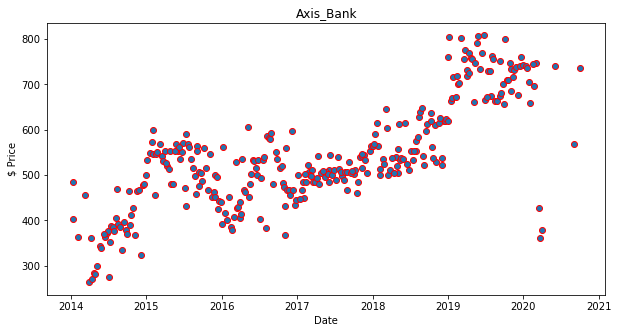

In [104]:
plt.figure(figsize=(10,5))
plt.scatter(stock_prices['Date'], stock_prices['Axis_Bank'], edgecolors='r')
plt.xlabel("Date")
plt.ylabel("$ Price")
plt.title("Axis_Bank")

Analyzing Axis bank stocks, there was raise in stock prices over years from 2014 to 2021. We also see declines in few places. Overall we see a good incline in the prices, which is beneficial for investors.

### Sun_Pharma Stock

Text(0.5, 1.0, 'Sun_Pharma')

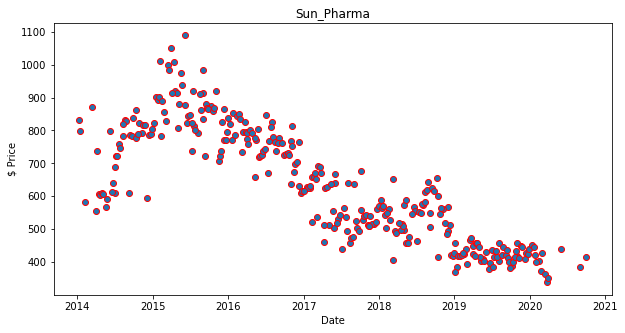

In [105]:
plt.figure(figsize=(10,5))
plt.scatter(stock_prices['Date'], stock_prices['Sun_Pharma'], edgecolors='r')
plt.xlabel("Date") 
plt.ylabel("$ Price")
plt.title("Sun_Pharma")

Analyzing Sun Pharma stocks, there was decline in stock prices over years from 2014 to 2021. We also see increase in prices in few place (2015). Overall we see a decline in the prices, which is not beneficial for investors.

## 2.2 Calculate Returns for all stocks with inference

### Analyzing returns

Steps for calculating returns from prices:

* Take logarithms
* Take differences

Creating stock returns based on the price of next day  and previous day stock price.

In [106]:
stock_returns = np.log(stock_prices.drop(['Date'],axis=1)).diff(axis = 0, periods = 1) 

#### Checking the rows & columns of dataset

In [107]:
stock_returns.shape

(314, 10)

In [108]:
stock_returns.head()

,Infosys,Indian_Hotel,Mahindra___Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.03,-0.01,0.01,0.05,0.03,0.03,0.09,-0.07,0.01,0.09
2,-0.01,0.00,-0.01,-0.02,-0.03,-0.01,-0.00,0.00,-0.01,-0.08
3,-0.00,0.00,0.07,0.05,0.00,0.01,-0.00,-0.02,0.00,0.01
4,0.01,-0.05,-0.01,-0.00,-0.08,-0.02,0.01,-0.14,-0.05,-0.15


Here we have calculated stock returns for all stocks and as per the head data, we can find that for 1st row there are null values. The reason is we don’t have previous days stock price to calculate.

## 2.3 Calculate Stock Means and Standard Deviation for all stocks with inference

### We now look at Means & Standard Deviations of these returns

- Stock Means: Average returns that the stock is making on a week to week basis
- Stock Standard Deviation : It is a measure of volatility meaning the more a stock's returns vary from the stock's average return, the more volatile the stock

### Calculating Stock Means

In [109]:
stock_means = stock_returns.mean(axis = 0)
stock_means

Infosys                0.00
Indian_Hotel           0.00
Mahindra___Mahindra   -0.00
Axis_Bank              0.00
SAIL                  -0.00
Shree_Cement           0.00
Sun_Pharma            -0.00
Jindal_Steel          -0.00
Idea_Vodafone         -0.01
Jet_Airways           -0.01
dtype: float64

### Calculating stock standard deviation

In [110]:
stock_sd = stock_returns.std(axis = 0)
stock_sd

Infosys               0.04
Indian_Hotel          0.05
Mahindra___Mahindra   0.04
Axis_Bank             0.05
SAIL                  0.06
Shree_Cement          0.04
Sun_Pharma            0.05
Jindal_Steel          0.08
Idea_Vodafone         0.10
Jet_Airways           0.10
dtype: float64

### Now we are creating a dataframe df for Average (Means) and Volatility (Standard Deviation) for all stocks

In [111]:
df = pd.DataFrame({'Average':stock_means, 'Volatility': stock_sd})
pd.options.display.float_format = '{:.5f}'.format  
df

,Average,Volatility
Infosys,0.00279,0.03507
Indian_Hotel,0.00027,0.04713
Mahindra___Mahindra,-0.00151,0.04017
Axis_Bank,0.00117,0.04583
SAIL,-0.00346,0.06219
Shree_Cement,0.00368,0.03992
Sun_Pharma,-0.00145,0.04503
Jindal_Steel,-0.00412,0.07511
Idea_Vodafone,-0.01061,0.10432
Jet_Airways,-0.00955,0.09797


Average describe Returns and Volatility describe Risks.

When analyzing all stocks we can find that the majority of the stock gives no profit.

## 2.4 Draw a plot of Stock Means vs Standard Deviation and state your inference

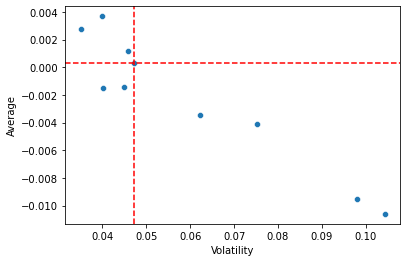

In [112]:
#plt.scatter(stock_sd, stock_means, edgecolors='r')
plot = sns.scatterplot(df['Volatility'], df['Average'])
plot.axvline(x=0.04713,linestyle='--', color = "red")
plot.axhline(y=0.00027,linestyle='--', color = "red")
plt.show()

In [113]:
df.loc['Indian_Hotel'][0]

0.00026639491673818036

In [114]:
df[df['Average'] > df.loc['Sun_Pharma'][0]].sort_values(by = 'Volatility')

,Average,Volatility
Infosys,0.00279,0.03507
Shree_Cement,0.00368,0.03992
Axis_Bank,0.00117,0.04583
Indian_Hotel,0.00027,0.04713


In this plot, it explains clearly that Stock with lower returns & higher risks do not play a role in a portfolio that has competing stock with more returns & less risk.

Thus for this data we have here left with only few stocks:
- Ones with higher return for a comparative or lower risk are considered better

## 2.5 Conclusion and Recommendations

### Conclusion:

Here in this dataset, we have several stocks which give us no profit. So those companies needs to concentrate on that. Those are high risk stocks.

### Recommendations:
- Investor can invest on Shree_Cement which gives low risk and high profit.
- The other one is Infosys which gives low risk and high profit.
- Mahindra___Mahindra, SAIL, Sun_Pharma, Jindal_Steel, Idea_Vodafone, Jet_Airways these are low performing stocks.
- A stock with low risk and high profit is where an investor would like to invest and earn. They don’t like to take more risk earning profits.